In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer

In [3]:
data_train = pd.read_csv('Model Train.csv', index_col = 0)

In [4]:
data_test = pd.read_csv('Model Test.csv', index_col = 0)

In [5]:
X = data_train.iloc[:,-23:-1]
Y = data_train.iloc[:,-1:]
x = data_test.iloc[:,-23:-1]
y = data_test.iloc[:,-1:]

In [6]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
133,134,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,220000
290,291,60,RL,120.0,15611,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,233230
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
1093,1094,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
1288,1289,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,278000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
350,351,120,RL,68.0,7820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318061
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000


In [7]:
X

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
133,Attchd,2001.0,Fin,2,471,TA,TA,Y,192,25,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
290,Attchd,2006.0,RFn,2,685,Gd,TA,Y,0,51,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
24,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
1093,Detchd,1977.0,Unf,2,884,TA,TA,Y,0,64,...,0,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal
1288,Attchd,2000.0,Fin,2,499,TA,TA,Y,212,59,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,Attchd,2005.0,Fin,2,410,TA,TA,Y,36,18,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
53,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
350,Attchd,2007.0,RFn,2,617,TA,TA,Y,210,54,...,0,0,NaN,NaN,NaN,0,12,2007,New,Partial
79,Detchd,1966.0,Unf,2,440,TA,TA,Y,74,0,...,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal


## **``REMOVE``**
### Pool Area 99.6% of values missing

In [8]:
sum(X.PoolArea == 0)

1164

In [9]:
sum(X.PoolArea == 0)/(X.PoolArea.count())*100

99.65753424657534

In [10]:
X = X.drop(['PoolArea'], axis = 1)

In [11]:
X

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
133,Attchd,2001.0,Fin,2,471,TA,TA,Y,192,25,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
290,Attchd,2006.0,RFn,2,685,Gd,TA,Y,0,51,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
24,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
1093,Detchd,1977.0,Unf,2,884,TA,TA,Y,0,64,...,0,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal
1288,Attchd,2000.0,Fin,2,499,TA,TA,Y,212,59,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,Attchd,2005.0,Fin,2,410,TA,TA,Y,36,18,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
53,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
350,Attchd,2007.0,RFn,2,617,TA,TA,Y,210,54,...,0,0,NaN,NaN,NaN,0,12,2007,New,Partial
79,Detchd,1966.0,Unf,2,440,TA,TA,Y,74,0,...,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal


## **``REMOVE``**
### Pool Quality also 99.6% values missing

In [12]:
X.PoolQC.isna().sum()

1164

In [13]:
X.PoolQC.isna().sum()/(X.PoolQC.shape[0])*100

99.65753424657534

### Fence Quality

In [14]:
X.Fence.isna().sum()/X.Fence.shape[0]*100

81.33561643835617

In [15]:
#Reaplce NaN with category "No Fence"
X['Fence'] = X['Fence'].fillna('NoFence')

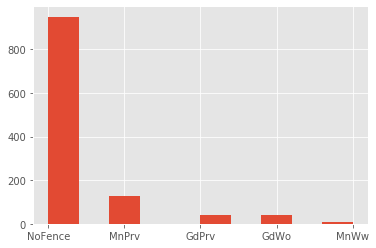

In [16]:
X.Fence.hist()

In [17]:
Y.SalePrice

133     220000
290     233230
24      154000
1093    146000
1288    278000
         ...  
802     189000
53      385000
350     318061
79      110000
792     269790
Name: SalePrice, Length: 1168, dtype: int64

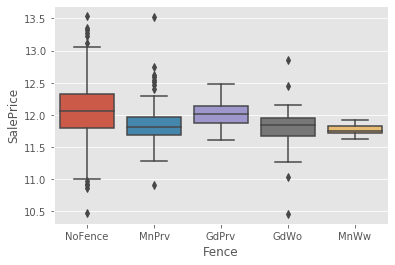

In [18]:
sns.boxplot(x = X.Fence, y = np.log(Y.SalePrice))

### Miscellaneous Features

In [19]:
X.MiscFeature.isna().sum()/X.shape[0]

0.9631849315068494

In [20]:
X.shape[0]

1168

In [21]:
sum(X.MiscFeature.isna() == False)

43

In [22]:
X.MiscFeature.isna().sum()/X.shape[0]*100

96.31849315068493

In [23]:
#Substitue NAs with 'No Feature'
X['MiscFeature'] = X['MiscFeature'].fillna('NoFeature')

In [24]:
# X['MiscFeature'][X['MiscFeature'] != 'No'] = 'Yes'

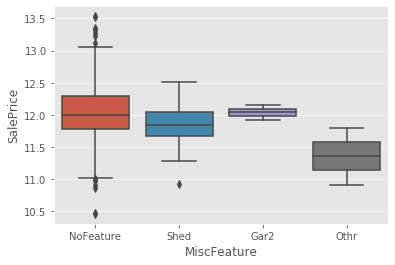

In [25]:
sns.boxplot(x = X.MiscFeature, y = np.log(Y.SalePrice))

### Miscellaneous Features Value

In [26]:
sum(X.MiscVal == 0)/X.shape[0]  

0.9648972602739726

In [27]:
pd.DataFrame(X.MiscVal.value_counts())

,MiscVal
0,1127
400,10
500,6
700,4
450,3
2000,3
600,3
480,2
1200,2
800,1


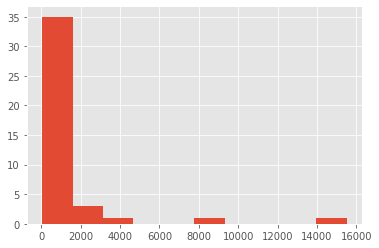

In [28]:
#non-zero values (only 41 value)

X.MiscVal[X.MiscVal != 0].hist() 

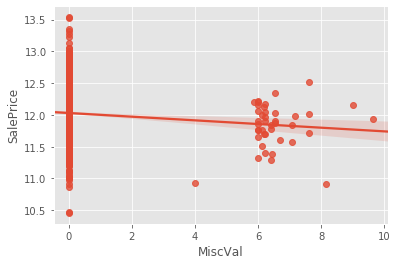

In [29]:
sns.regplot(np.log(X.MiscVal+1), np.log(Y.SalePrice))

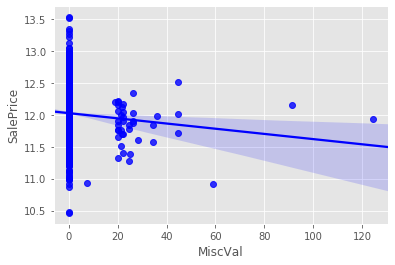

In [30]:
sns.regplot(np.sqrt(X.MiscVal), np.log(Y.SalePrice), color = 'blue')

In [31]:
(np.sqrt(X.MiscVal)).corr(np.log(Y.SalePrice))

-0.06838725851657507

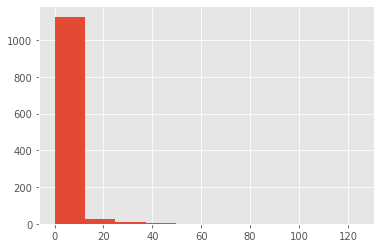

In [32]:
np.sqrt(X.MiscVal).hist()

### Month Sold (probably delete, not sure is seasonality necessary)

In [33]:
#no missing
#no zeros

print(X.MoSold.isna().sum())
print( (X.MoSold == 0).sum())

0
0


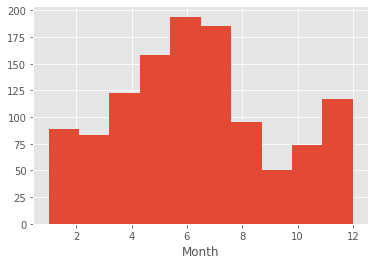

In [34]:
X.MoSold.hist()
plt.xlabel('Month')
plt.show()

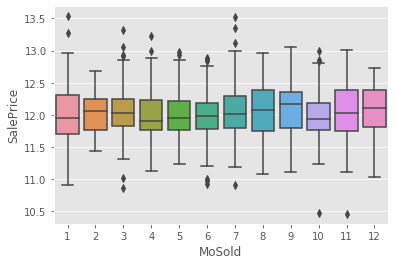

In [35]:
sns.boxplot(X.MoSold, np.log(Y.SalePrice))

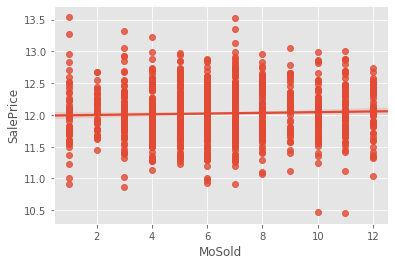

In [36]:
sns.regplot(X.MoSold, np.log(Y.SalePrice))

In [37]:
X.MoSold.corr(np.log(Y.SalePrice))

0.038131874519100606

In [38]:
Z = pd.read_csv('Model Train.csv', index_col=0)

<BarContainer object of 12 artists>

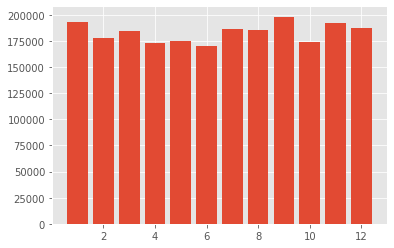

In [39]:
#no apparent seasonality
#probably delete after analysis

Z1 = Z[['MoSold','SalePrice']].groupby('MoSold').mean().reset_index()

plt.bar(Z1['MoSold'], Z1['SalePrice'])

### Year Sold  (Combine with Year built, to get  - ``Age``)

In [40]:
#no missing
#no zeros

print(X.YrSold.isna().sum())
print( (X.YrSold == 0).sum())

0
0


In [41]:
#Replace years with ordinals
# X.YrSold = X.YrSold.replace({2006 : 0, 2007: 1, 2008: 2, 2009: 3, 2010: 4})

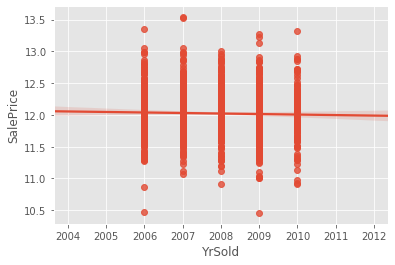

In [42]:
sns.regplot(X.YrSold, np.log(Y.SalePrice))

In [43]:
#Replace years with ordinals
# X.YrSold = X.YrSold.replace({2006 : 0, 2007: 1, 2008: 2, 2009: 3, 2010: 4})

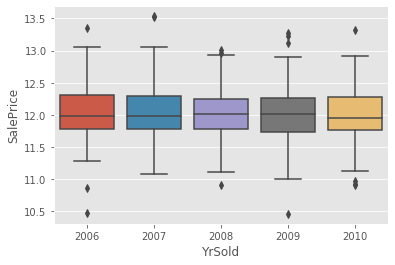

In [44]:
sns.boxplot(X.YrSold, np.log(Y.SalePrice))

In [45]:
X.YrSold.corr(np.log(Y.SalePrice))

-0.027429076146896207

### Paved Drive

In [46]:
#No NAs

X.PavedDrive.isna().sum()

0

In [47]:
X.PavedDrive.isnull().sum()

0

In [48]:
pd.DataFrame(X.PavedDrive.value_counts())

,PavedDrive
Y,1068
N,73
P,27


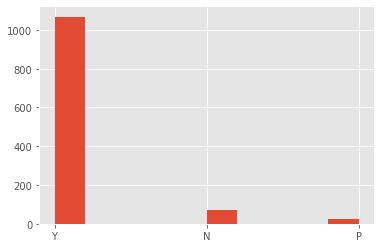

In [49]:
X.PavedDrive.hist()
plt.show()

### Wood Deck Area

In [50]:
(X.WoodDeckSF == 0).sum()/X.shape[0]*100  #only 52% are zero

52.3972602739726

In [51]:
pd.DataFrame(X.WoodDeckSF.value_counts())

,WoodDeckSF
0,612
192,31
100,28
144,27
120,24
...,...
242,1
500,1
238,1
237,1


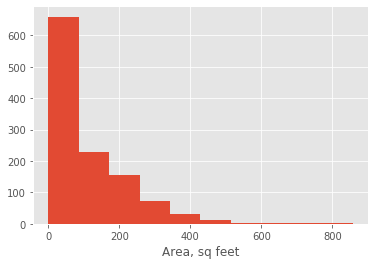

In [52]:
X.WoodDeckSF.hist()
plt.xlabel('Area, sq feet')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


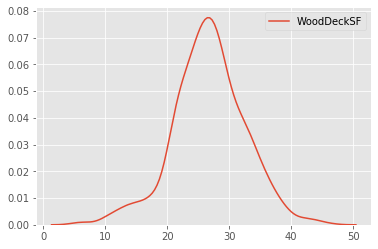

In [53]:
#Log squared tranformation

sns.kdeplot(np.log(X.WoodDeckSF)**2)
# sns.kdeplot(np.sqrt(X.WoodDeckSF))

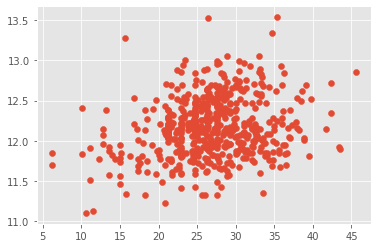

In [54]:
plt.scatter(np.log(X.WoodDeckSF)**2, np.log(Y.SalePrice))

### Open Porch Area

In [55]:
sum(X.OpenPorchSF == 0)/X.shape[0] #only 45% missing

0.4503424657534247

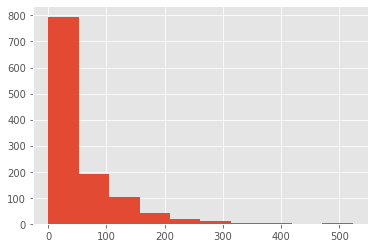

In [56]:
X.OpenPorchSF.hist()

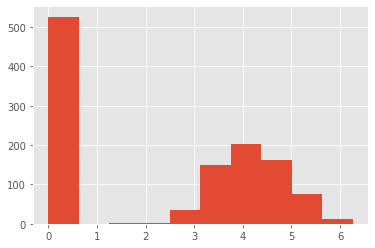

In [57]:
np.log(X.OpenPorchSF+1).hist()

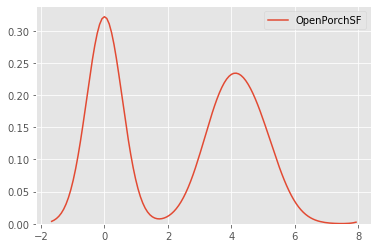

In [58]:
sns.kdeplot(np.log(X.OpenPorchSF+1))

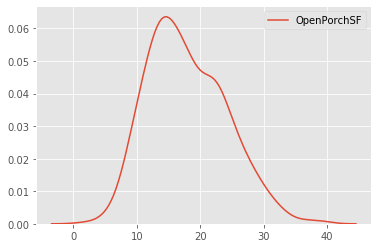

In [59]:
#Log squared transformation
sns.kdeplot(np.log(X.OpenPorchSF)**2)

### Enclosed Porch Area

In [60]:
sum(X.EnclosedPorch == 0)/X.shape[0] #84% values zero

0.8450342465753424

In [61]:
np.corrcoef(X.OpenPorchSF, X.EnclosedPorch) #no correlation with Open PorchSf

array([[ 1.        , -0.09127014],
       [-0.09127014,  1.        ]])

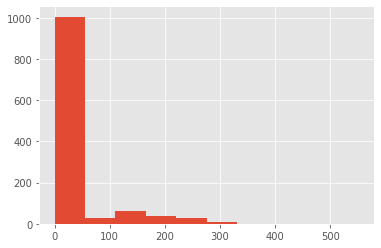

In [62]:
X.EnclosedPorch.hist()

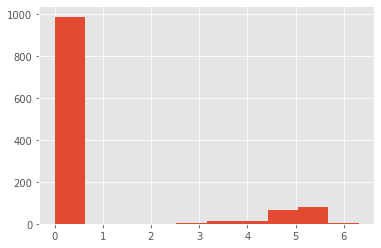

In [63]:
np.log(X.EnclosedPorch+1).hist()

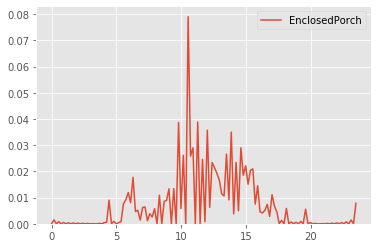

In [64]:
#Transfort with sqrt
sns.kdeplot(np.sqrt(X.EnclosedPorch))

### Three-Season Porch Area

In [65]:
sum(X['3SsnPorch'] == 0)/X.shape[0]*100 #98.28% values missing

98.28767123287672

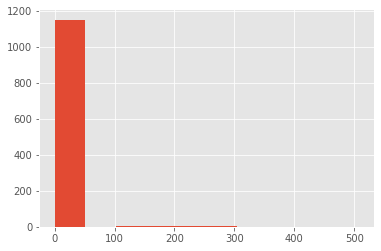

In [66]:
X['3SsnPorch'].hist()

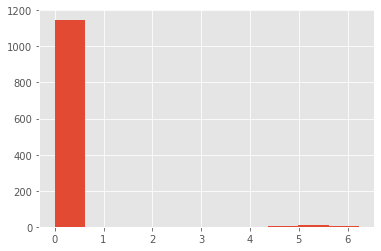

In [67]:
np.log(X['3SsnPorch']+1).hist()

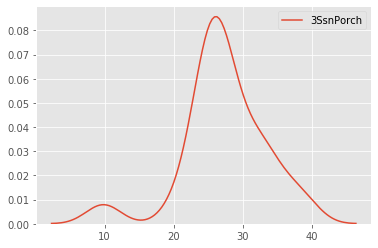

In [68]:
# sns.kdeplot(np.log(X['3SsnPorch']+1))
# sns.kdeplot(np.sqrt(X['3SsnPorch']))
sns.kdeplot(np.log(X['3SsnPorch'])**2)
# sns.kdeplot(np.log(X['3SsnPorch']**2))

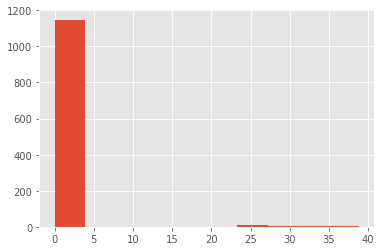

In [69]:
(np.log(X['3SsnPorch']+1)**2).hist()

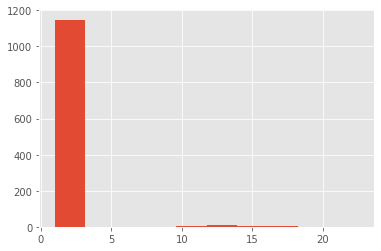

In [70]:
np.sqrt(X['3SsnPorch']+1).hist()

In [71]:
X['3SsnPorch'] == 0

133     True
290     True
24      True
1093    True
1288    True
        ... 
802     True
53      True
350     True
79      True
792     True
Name: 3SsnPorch, Length: 1168, dtype: bool

### Screen Porch Area

In [72]:
sum(X.ScreenPorch == 0)/X.shape[0]*100 #92.80% of values missing

92.8082191780822

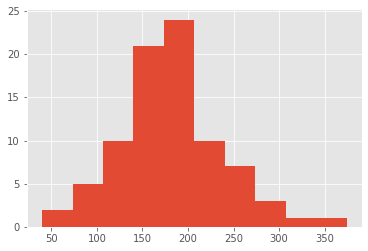

In [73]:
X['ScreenPorch'][X.ScreenPorch != 0].hist()

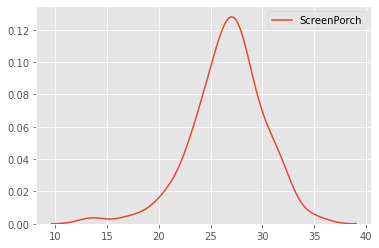

In [74]:
sns.kdeplot(np.log(X.ScreenPorch)**2)

### Garage Type

In [75]:
X.GarageType.isna().sum()  #almost no NAs

65

In [76]:
X.GarageType.value_counts()

Attchd     685
Detchd     318
BuiltIn     74
Basment     15
CarPort      7
2Types       4
Name: GarageType, dtype: int64

In [77]:
X['GarageType'] = X['GarageType'].fillna('NoGarage')

In [78]:
X.GarageType.value_counts()

Attchd      685
Detchd      318
BuiltIn      74
NoGarage     65
Basment      15
CarPort       7
2Types        4
Name: GarageType, dtype: int64

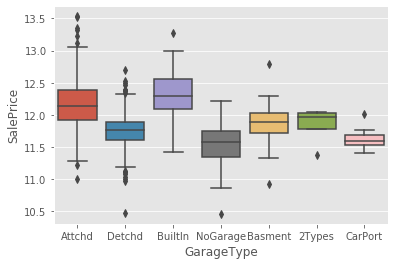

In [79]:
sns.boxplot(X.GarageType, np.log(Y.SalePrice))

### Garage Year Built (maybe tranform into garage age, house year sold - year built)

In [80]:
sum(X.GarageYrBlt == 0)

0

In [81]:
X.GarageYrBlt.isna().sum()

65

In [82]:
X[['GarageYrBlt']]

,GarageYrBlt
133,2001.0
290,2006.0
24,1968.0
1093,1977.0
1288,2000.0
...,...
802,2005.0
53,1981.0
350,2007.0
79,1966.0


In [83]:
cat_ord_imp1 = SimpleImputer(strategy='mean')
cat_ord_imp1 = cat_ord_imp1.fit(X[['GarageYrBlt']])
X[['GarageYrBlt']] = pd.DataFrame(cat_ord_imp1.transform(X[['GarageYrBlt']]), columns=['GarageYrBlt'],index = X[['GarageYrBlt']].index)



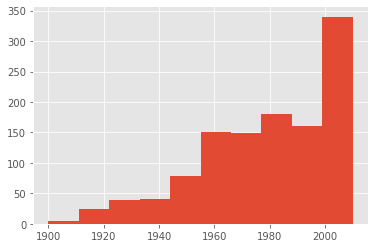

In [84]:
X.GarageYrBlt.hist()

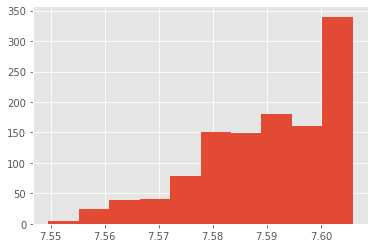

In [85]:
np.log(X.GarageYrBlt).hist()

In [86]:
# sns.kdeplot(np.sqrt(X.GarageYrBlt))
# sns.kdeplot(np.log(X.GarageYrBlt))
# sns.kdeplot(np.log(X.GarageYrBlt)**1.5)

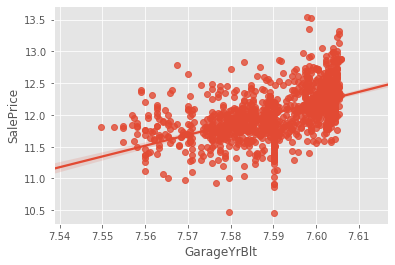

In [87]:
sns.regplot(np.log(X.GarageYrBlt), np.log(Y.SalePrice))

In [88]:
np.log(X.GarageYrBlt).corr(np.log(Y.SalePrice))

0.5232363077411539

In [89]:
#Convert NA into year built = year sold
#so that age will be zero in new column

X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['YrSold'])

In [90]:
#Create new columns, GarageAge

X['GarageAge'] = X['YrSold'] - X['GarageYrBlt']

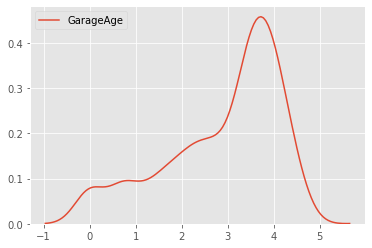

In [91]:
sns.kdeplot(np.log(X.GarageAge+1))

In [92]:
np.log(X.GarageAge+1).corr(np.log(Y.SalePrice))

-0.5696597435750942

In [93]:
#Delete Garage Year Built Column

# X = X.drop('GarageYrBlt', axis = 1)

### Garage Finish

In [94]:
X.GarageFinish.isna().sum()

65

In [95]:
#Fill NAs with No Finish

X['GarageFinish'] = X['GarageFinish'].fillna('NoFinish')

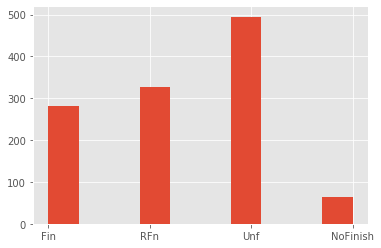

In [96]:
X.GarageFinish.hist()
plt.show()

### Garage Car Capacity (don't dummify, leave as numeric)

In [97]:
X.GarageCars.isna().sum() #no NAs

0

In [98]:
sum(X.GarageCars == 0)

65

In [100]:
X.GarageCars.value_counts()

2    669
1    286
3    143
0     65
4      5
Name: GarageCars, dtype: int64

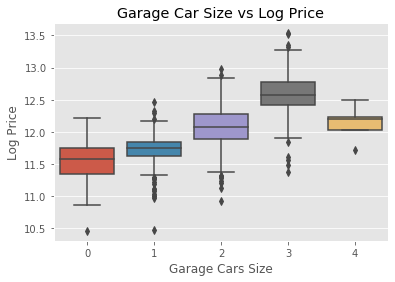

In [114]:
sns.boxplot(X.GarageCars, np.log(Y.SalePrice),).set(title = 'Garage Car Size vs Log Price',
                                                    xlabel = 'Garage Cars Size',
                                                   ylabel = 'Log Price')


plt.savefig('GarageCars', dpi = 400)

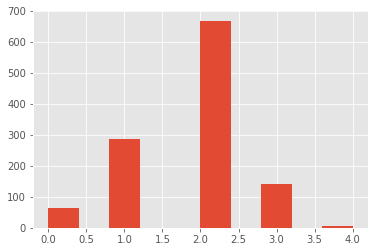

In [115]:
X.GarageCars.hist()
plt.show()

In [285]:
X.GarageCars.corr(np.log(Y.SalePrice))

0.6641137607936676

In [286]:
X.GarageArea.corr(np.log(Y.SalePrice))

0.6516906461629336

In [287]:
X.GarageArea.corr(X.GarageCars)

0.8870706317670723

### Garage Area (keep this one)

In [288]:
X.GarageArea.isna().sum()

0

In [289]:
sum(X.GarageArea == 0)

65

In [290]:
corrMatrix = X[['GarageArea','GarageCars']].corr() #super-correlated with number of cars in garage
print (corrMatrix)

            GarageArea  GarageCars
GarageArea    1.000000    0.887071
GarageCars    0.887071    1.000000


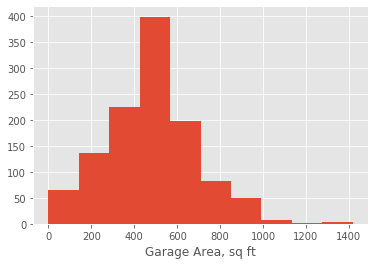

In [291]:
X.GarageArea.hist()
plt.xlabel('Garage Area, sq ft')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


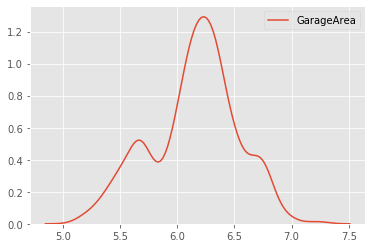

In [292]:
sns.kdeplot(np.log(X.GarageArea))
# sns.kdeplot(X.GarageArea)

In [293]:
np.log(X.GarageArea+1).corr(np.log(Y.SalePrice))

0.4316804899893318

In [294]:
X.GarageArea.corr(X.GarageCars)

0.8870706317670723

In [295]:
X.GarageArea.corr(np.log(Y.SalePrice))

0.6516906461629336

In [296]:
X.GarageCars.corr(np.log(Y.SalePrice))

0.6641137607936676

### Garage Quality

In [297]:
X.GarageQual.isna().sum()

65

In [298]:
X.GarageQual.value_counts()

TA    1046
Fa      42
Gd      11
Po       3
Ex       1
Name: GarageQual, dtype: int64

In [300]:
# cat_ord_imp2 = SimpleImputer(strategy='most_frequent')
# cat_ord_imp2 = cat_ord_imp.fit(X[['GarageQual']])

# X[['GarageQual']] = pd.DataFrame(cat_ord_imp2.transform(X[['GarageQual']]), columns=['GarageQual'], index = X[['GarageQual']].index)



In [301]:
#Substitue NAs with lowest simplest category
# X['GarageQual'] = X['GarageQual'].fillna('TA')

In [302]:
K = X.GarageQual.copy()
K = K.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4, 'Ex':5})

In [303]:
K.corr(np.log(Y.SalePrice))

0.2075688244129002

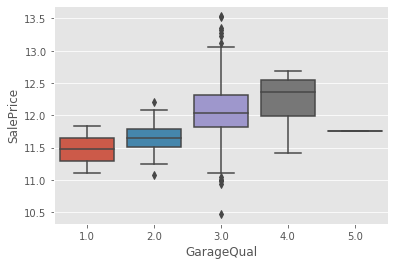

In [304]:
sns.boxplot(K, np.log(Y.SalePrice))

### Garage Conditionsn - DROP

In [ ]:
X.GarageCond.isna().sum()

In [ ]:
X['GarageCond'] = X['GarageCond'].fillna('TA')

In [ ]:
X.GarageCond.isna().sum()

In [ ]:
sum(X.GarageQual == X.GarageCond)/X.shape[0] #95% of values are the same as GarageQuality

In [ ]:
sns.boxplot(X.GarageQual, np.log(Y.SalePrice))

In [ ]:
K = X.GarageQual.copy()
K = K.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4, 'Ex':5})

M = X.GarageCond.copy()
M = M.replace({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4, 'Ex':5})

In [ ]:
K.corr(np.log(Y.SalePrice))

In [ ]:
M.corr(np.log(Y.SalePrice))

### Sale Type

In [ ]:
X.SaleType.isna().sum()

In [ ]:
X.SaleType.value_counts()  #make WD base

In [ ]:
X.SaleType.hist()

In [ ]:
sns.boxplot(X.SaleType, np.log(Y.SalePrice))

### Sale Condition

In [ ]:
X.SaleCondition.isna().sum()

In [ ]:
X.SaleCondition.value_counts() #normal is base

In [ ]:
X.SaleCondition.hist()

In [ ]:
sns.boxplot(X.SaleCondition, np.log(Y.SalePrice))

In [326]:
(X[['OpenPorchSF', 'EnclosedPorch','EnclosedPorch','3SsnPorch' ,'ScreenPorch']] == 0).sum()

OpenPorchSF       526
EnclosedPorch     987
EnclosedPorch     987
3SsnPorch        1148
ScreenPorch      1084
dtype: int64

In [319]:
(X[['OpenPorchSF', 'EnclosedPorch','EnclosedPorch','3SsnPorch' ,'ScreenPorch']] == 0).sum(axis = 1)

133     4
290     4
24      4
1093    4
1288    4
       ..
802     4
53      4
350     4
79      3
792     4
Length: 1168, dtype: int64

In [351]:
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']

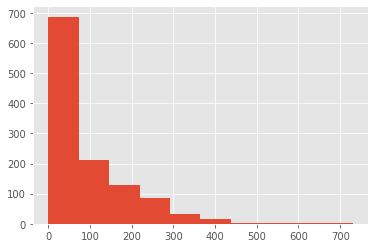

In [352]:
X['TotalPorch'].hist()

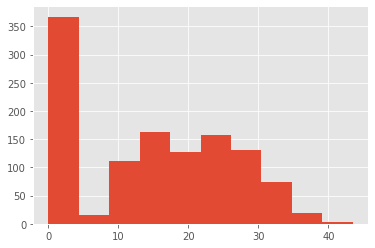

In [353]:
(np.log(X['TotalPorch']+1)**2).hist()

In [354]:
X['TotalPorch'].corr(np.log(Y.SalePrice))

0.16191190285262194

In [368]:
np.log(X['TotalPorch']+1).corr(np.log(Y.SalePrice))

0.28684214695219373

In [366]:
np.log(X['WoodDeckSF']+1).corr(np.log(Y.SalePrice))

0.3721824663578502

In [367]:
(np.log(X['WoodDeckSF']+1)**2).corr(np.log(Y.SalePrice))

0.38010447706196665

In [369]:
(np.log(X['TotalPorch']+1)**2).corr(np.log(Y.SalePrice))

0.2465532586516514

In [356]:
np.sqrt(X['TotalPorch']).corr(np.log(Y.SalePrice))

0.23460506354667612

### Quick Check for MultiColineratiy

In [350]:
X.corr()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,GarageAge,TotalPorch
GarageYrBlt,1.000000,0.483667,0.483148,0.226124,0.226033,-0.287678,0.017800,-0.026546,-0.022749,0.005201,0.011188,-0.998473,-0.157191
GarageCars,0.483667,1.000000,0.887071,0.229609,0.181264,-0.144922,0.034686,0.041731,-0.047121,0.036724,-0.039753,-0.485424,-0.024921
GarageArea,0.483148,0.887071,1.000000,0.234784,0.219903,-0.105526,0.037063,0.047749,-0.030194,0.034105,-0.029780,-0.484354,0.029492
WoodDeckSF,0.226124,0.229609,0.234784,1.000000,0.071980,-0.126473,-0.036970,-0.072553,-0.004161,0.025903,0.021790,-0.224715,-0.111497
OpenPorchSF,0.226033,0.181264,0.219903,0.071980,1.000000,-0.091270,-0.003637,0.032133,-0.038393,0.067822,-0.042659,-0.228184,0.376326
EnclosedPorch,-0.287678,-0.144922,-0.105526,-0.126473,-0.091270,1.000000,-0.038909,-0.083980,0.021264,-0.029210,-0.005689,0.287102,0.801132
3SsnPorch,0.017800,0.034686,0.037063,-0.036970,-0.003637,-0.038909,1.000000,-0.030934,0.001854,0.019257,0.012679,-0.017083,0.163865
ScreenPorch,-0.026546,0.041731,0.047749,-0.072553,0.032133,-0.083980,-0.030934,1.000000,-0.008932,0.029327,0.017185,0.027471,0.274828
MiscVal,-0.022749,-0.047121,-0.030194,-0.004161,-0.038393,0.021264,0.001854,-0.008932,1.000000,-0.007264,0.000790,0.022772,-0.001106
MoSold,0.005201,0.036724,0.034105,0.025903,0.067822,-0.029210,0.019257,0.029327,-0.007264,1.000000,-0.147359,-0.013338,0.018647


In [989]:
pd.concat([X, Y], axis = 1).corr()

,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageAge,SalePrice
GarageCars,1.000000,0.887071,0.229609,0.181264,-0.144922,0.034686,0.041731,0.037322,-0.047121,0.036724,-0.039753,-0.311751,0.626152
GarageArea,0.887071,1.000000,0.234784,0.219903,-0.105526,0.037063,0.047749,0.100530,-0.030194,0.034105,-0.029780,-0.321509,0.624247
WoodDeckSF,0.229609,0.234784,1.000000,0.071980,-0.126473,-0.036970,-0.072553,0.034000,-0.004161,0.025903,0.021790,-0.189287,0.326685
OpenPorchSF,0.181264,0.219903,0.071980,1.000000,-0.091270,-0.003637,0.032133,0.036925,-0.038393,0.067822,-0.042659,-0.213369,0.293674
EnclosedPorch,-0.144922,-0.105526,-0.126473,-0.091270,1.000000,-0.038909,-0.083980,0.095588,0.021264,-0.029210,-0.005689,0.259431,-0.128271
3SsnPorch,0.034686,0.037063,-0.036970,-0.003637,-0.038909,1.000000,-0.030934,-0.006807,0.001854,0.019257,0.012679,-0.008800,0.047830
ScreenPorch,0.041731,0.047749,-0.072553,0.032133,-0.083980,-0.030934,1.000000,-0.015412,-0.008932,0.029327,0.017185,0.043794,0.082761
PoolArea,0.037322,0.100530,0.034000,0.036925,0.095588,-0.006807,-0.015412,1.000000,-0.004845,-0.071386,-0.048784,0.011752,0.110992
MiscVal,-0.047121,-0.030194,-0.004161,-0.038393,0.021264,0.001854,-0.008932,-0.004845,1.000000,-0.007264,0.000790,0.019628,-0.030120
MoSold,0.036724,0.034105,0.025903,0.067822,-0.029210,0.019257,0.029327,-0.071386,-0.007264,1.000000,-0.147359,-0.006119,0.030596
